In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("data/Cancer_Data.csv")
df = df.drop(columns=["Unnamed: 32"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(df['diagnosis'].value_counts())  # Check the unique values in the diagnosis column


diagnosis
B    357
M    212
Name: count, dtype: int64


In [4]:
df['diagnosis'].unique() # Computers aren't so good at understanding words/letters, as they are better with numbers
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cols = [
    "id", 
    "diagnosis", 
    "radius_mean", 
    "texture_mean", 
    "perimeter_mean", 
    "area_mean", 
    "smoothness_mean", 
    "compactness_mean", 
    "concavity_mean", 
    "concave points_mean", 
    "symmetry_mean", 
    "fractal_dimension_mean", 
    "radius_se", 
    "texture_se", 
    "perimeter_se", 
    "area_se", 
    "smoothness_se", 
    "compactness_se", 
    "concavity_se", 
    "concave points_se", 
    "symmetry_se", 
    "fractal_dimension_se", 
    "radius_worst", 
    "texture_worst", 
    "perimeter_worst", 
    "area_worst", 
    "smoothness_worst", 
    "compactness_worst", 
    "concavity_worst", 
    "concave points_worst", 
    "symmetry_worst", 
    "fractal_dimension_worst"
]

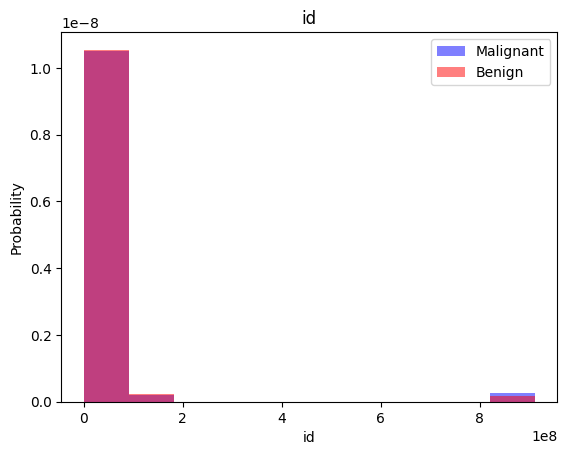

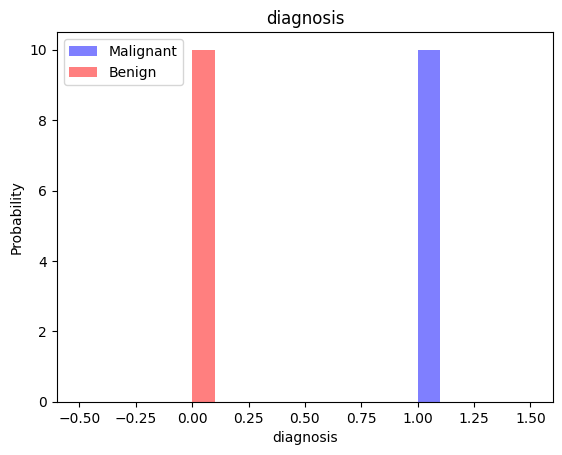

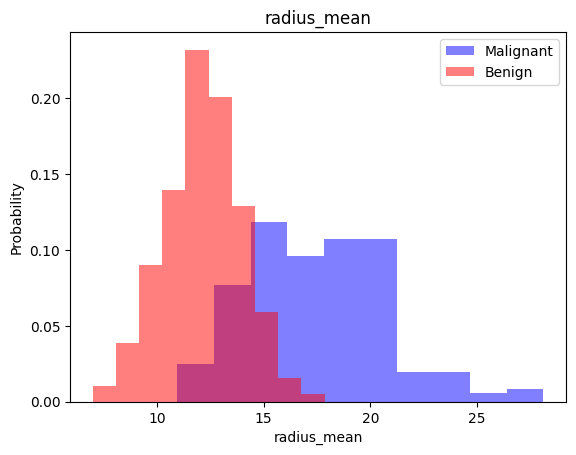

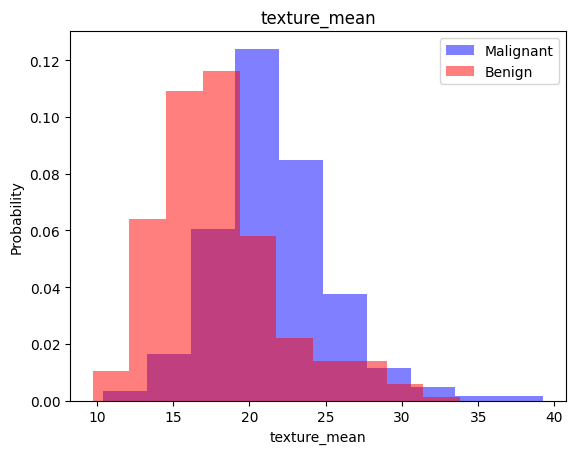

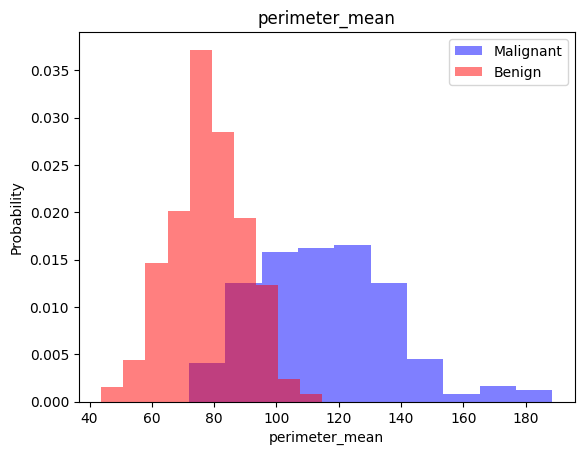

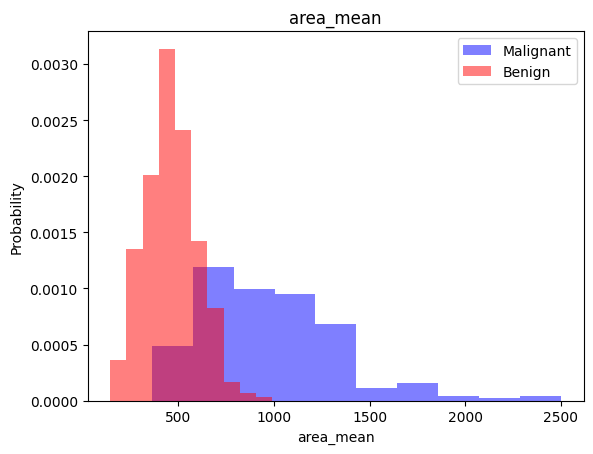

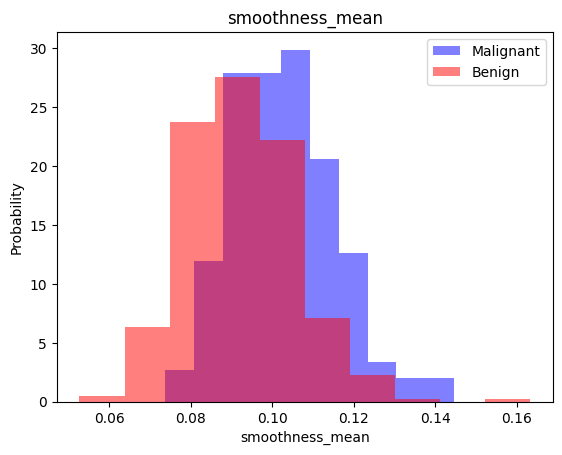

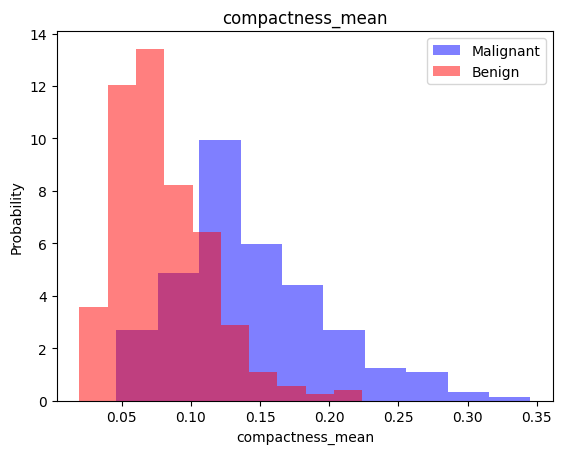

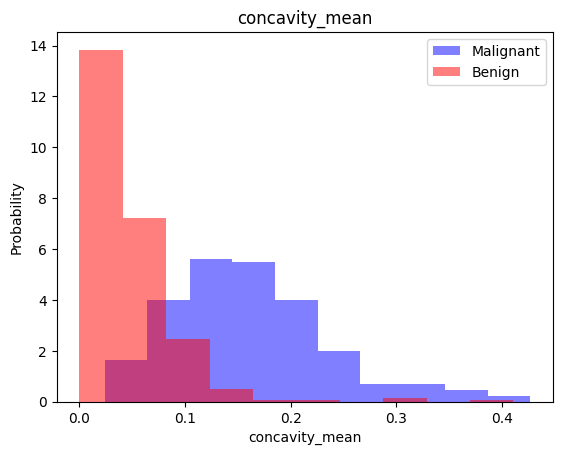

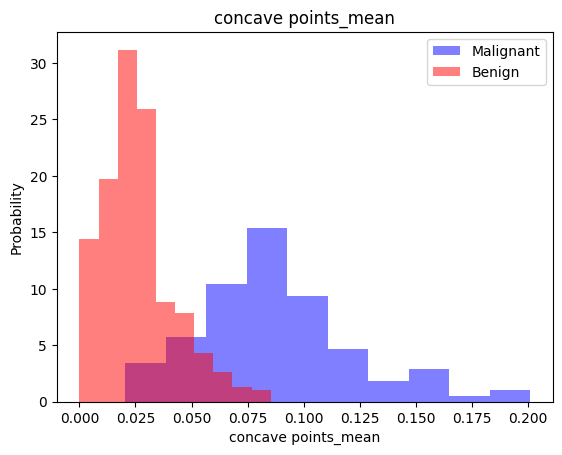

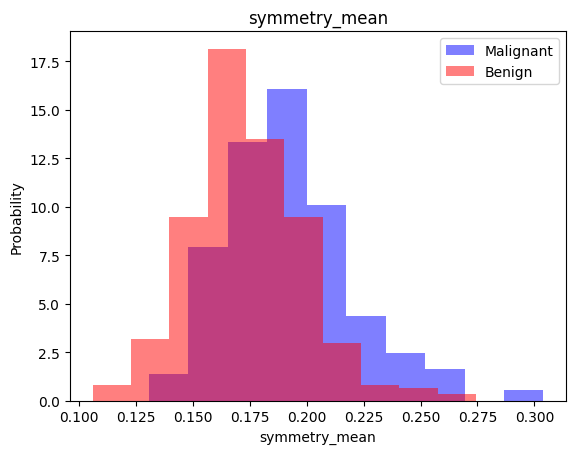

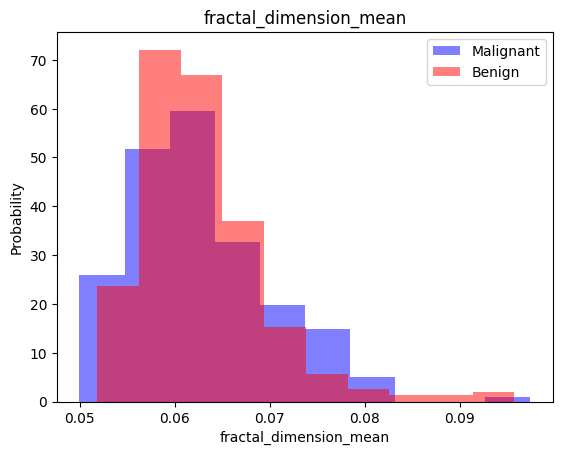

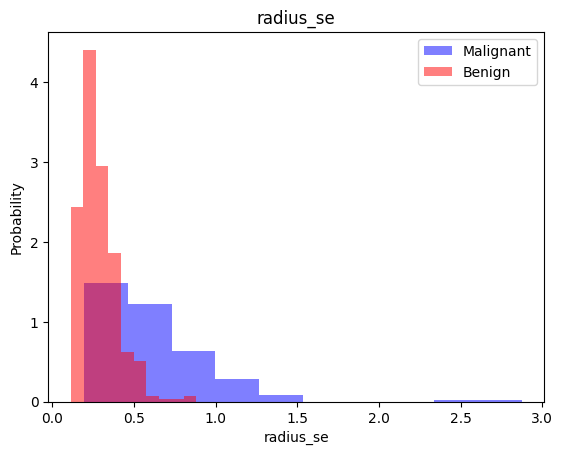

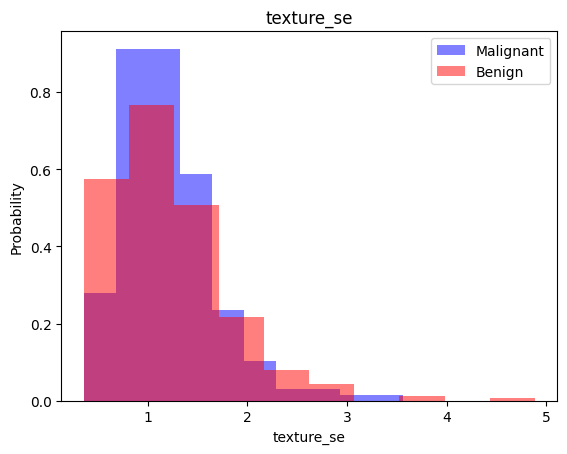

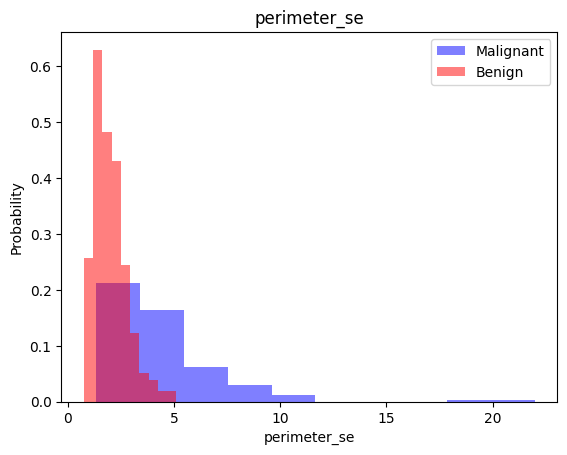

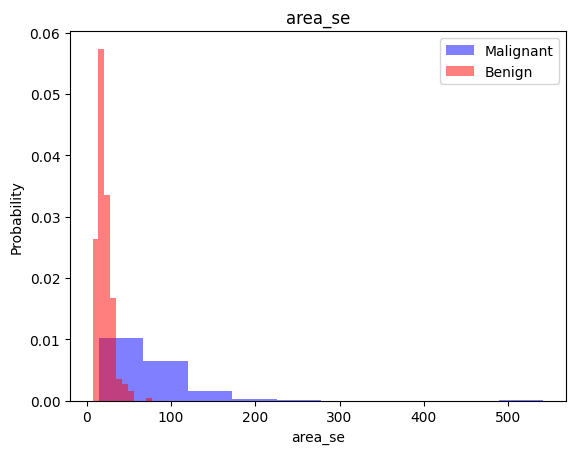

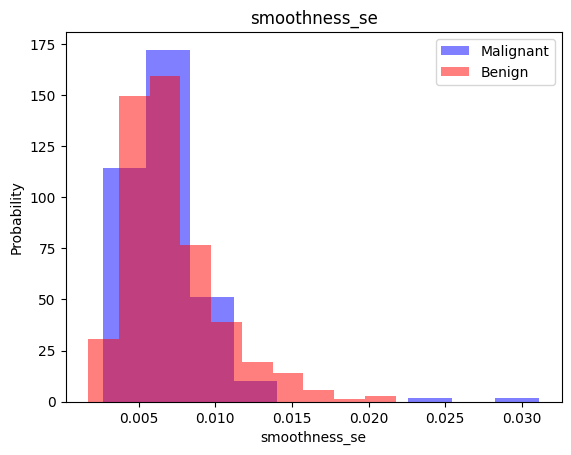

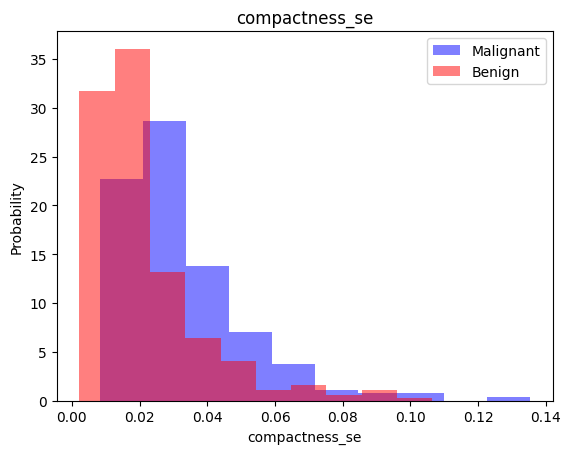

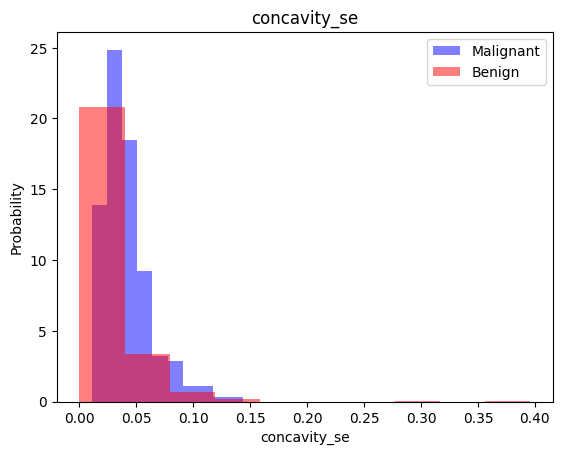

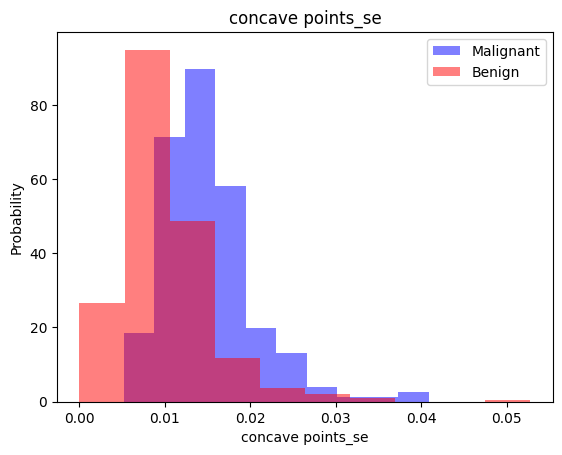

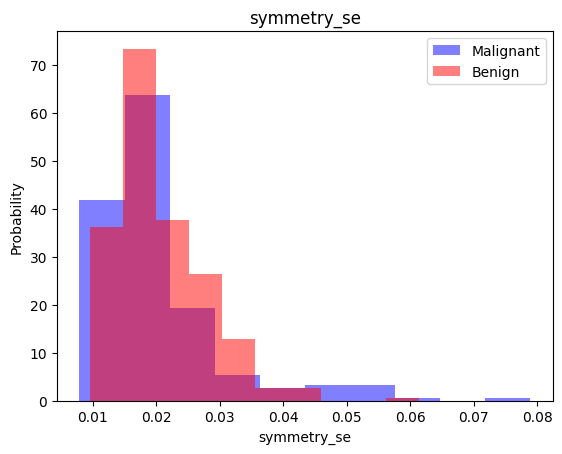

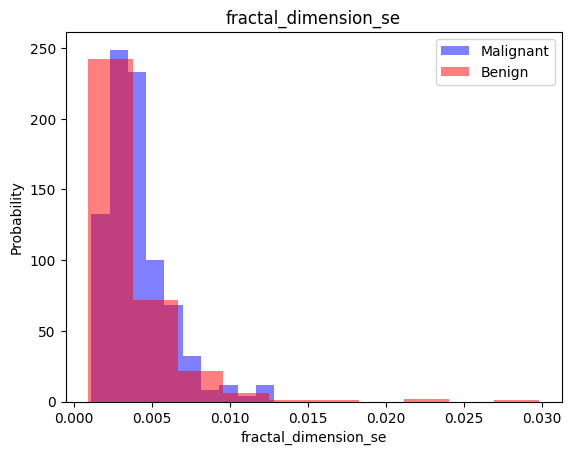

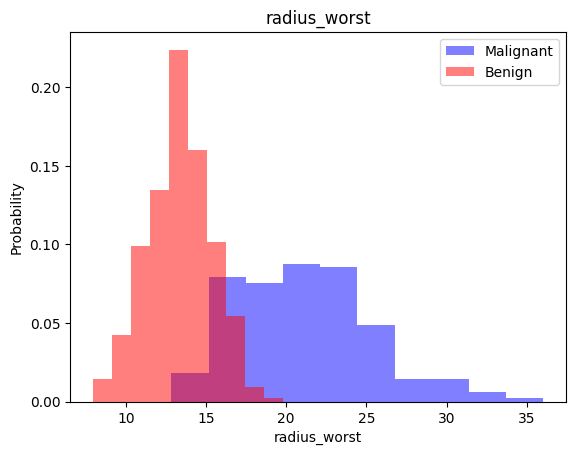

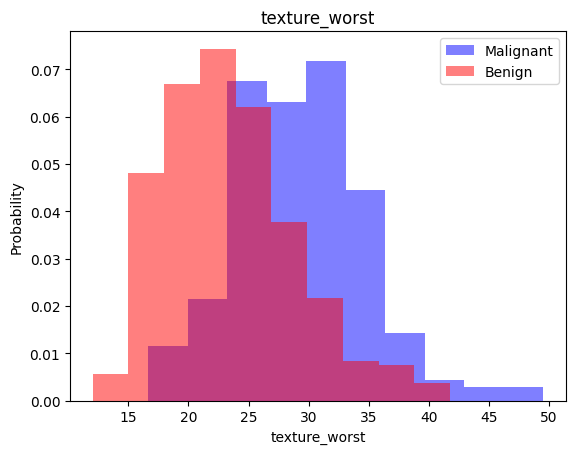

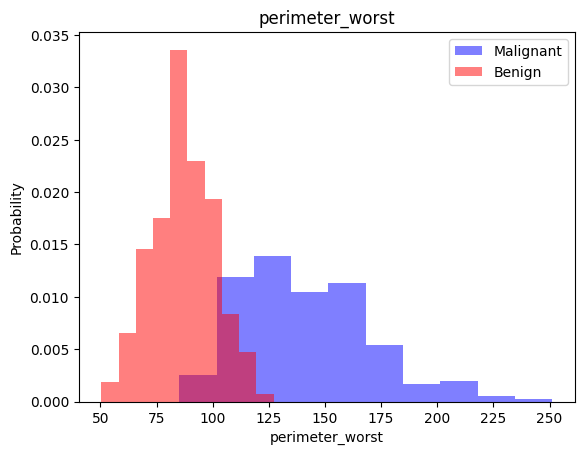

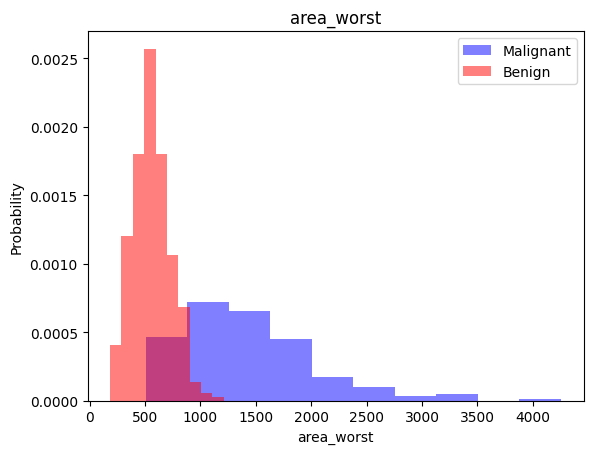

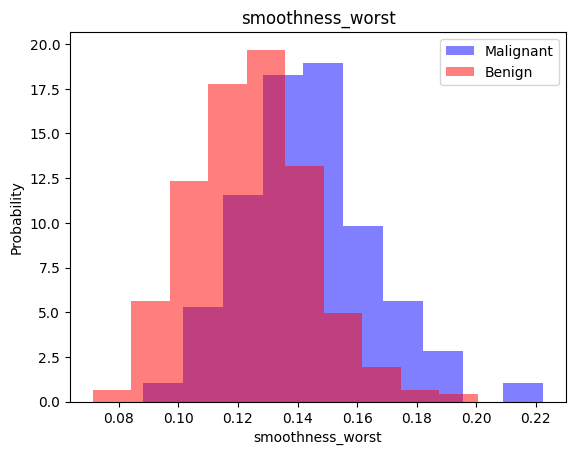

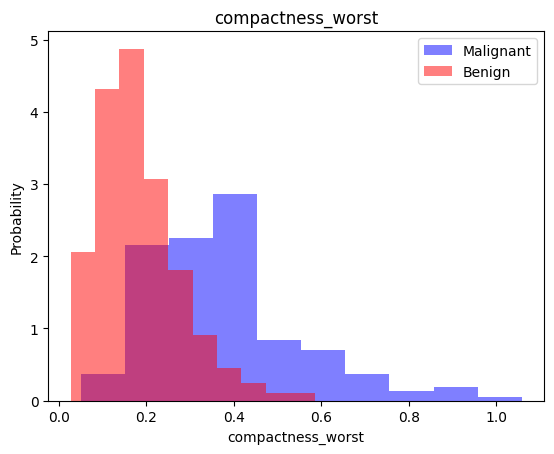

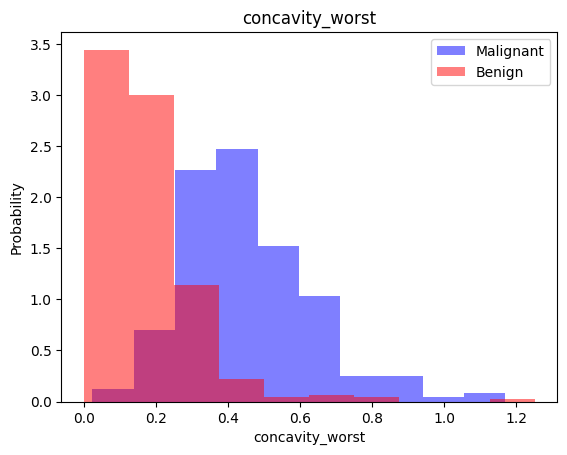

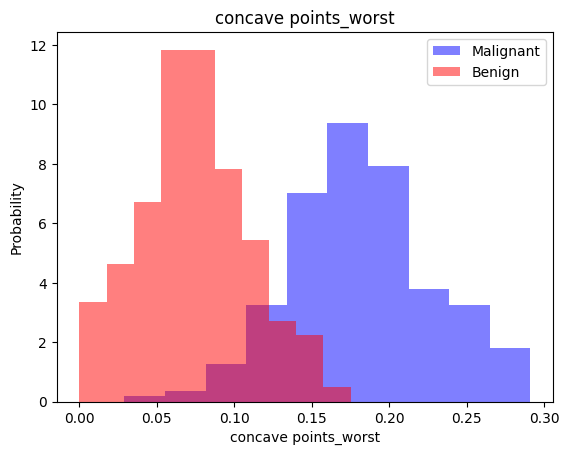

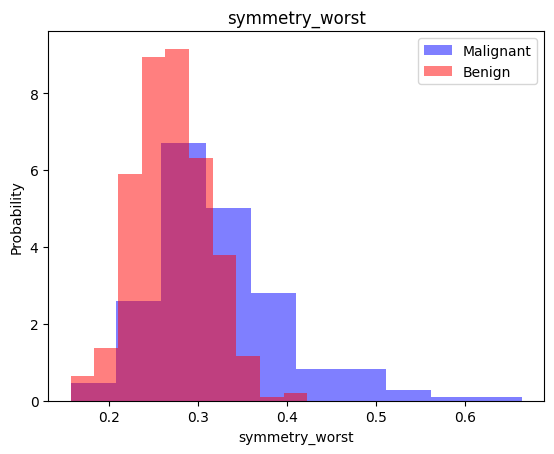

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["diagnosis"] == 1][label], color='blue', label='Malignant', alpha=0.5, density=True)
    plt.hist(df[df["diagnosis"] == 0][label], color='red', label='Benign', alpha=0.5, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6* len(df)), int(0.8*len(df))])

/Users/eyad/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
print(len(train[train["diagnosis"] ==  1]))
print(len(train[train["diagnosis"] ==  0]))

134
207


In [9]:
def scale_dataset(dataframe, oversample=False):

    if isinstance(dataframe, np.ndarray):
        dataframe = pd.DataFrame(dataframe)

    dataframe = dataframe.dropna(subset=['diagnosis'])
    
    # Separate features (X) and target labels (y)
    X = dataframe.drop(columns=["id", "diagnosis"]).values  # Features excluding 'id' and 'diagnosis'
    y = dataframe["diagnosis"].values  # Target variable 'diagnosis'

    # Ensure 'y' is binary (0 or 1), if not already
    y = y.astype(int)  # Convert to int type just in case

    scaler = StandardScaler()

    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)


    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [10]:
print(train.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)


In [12]:
validation, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False) # we want to test it on unseen data. How will our sample go with a random set of data?

In [13]:
print(f"How many in total: {len(y_train)}")
print(sum(y_train == 1)) 
print(sum(y_train == 0))

How many in total: 414
207
207


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_prediction = knn_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        76
           1       0.90      0.95      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [20]:
y_prediction = nb_model.predict(X_test)

In [21]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        76
           1       0.77      0.89      0.83        38

    accuracy                           0.88       114
   macro avg       0.86      0.88      0.87       114
weighted avg       0.89      0.88      0.88       114



In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [24]:
y_prediction = lg_model.predict(X_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.93      0.97      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [27]:
y_prediction = svm_model.predict(X_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       0.90      0.97      0.94        38

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [28]:
import tensorflow as tf  

2025-02-13 13:07:24.223860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/eyad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


No supported GPU was found.


In [29]:
def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


    ax1.plot(history.history['loss'], label="loss")
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label="Accuracy")
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)


    fig.legend()
    fig.show()

In [32]:
print(X_train.shape)

(414, 30)


In [33]:

def train_model(X_train, y_train, num_nodes, dropout_prob, learn_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learn_rate), loss='binary_crossentropy',
    metrics=['accuracy']) 

    history = nn_model.fit(X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, learning rate of 0.005, batch size 32
4/4 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.9561


/var/folders/yf/7qfwxqf51ynfg26hfq_lprqh0000gn/T/ipykernel_70043/1954446828.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


16 nodes, dropout 0, learning rate of 0.005, batch size 64
4/4 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9825
16 nodes, dropout 0, learning rate of 0.005, batch size 128
4/4 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9561
16 nodes, dropout 0, learning rate of 0.005, batch size 32
4/4 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.9737
16 nodes, dropout 0, learning rate of 0.005, batch size 64
4/4 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9649
16 nodes, dropout 0, learning rate of 0.005, batch size 128
4/4 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9825
16 nodes, dropout 0, learning rate of 0.001, batch size 32
4/4 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9649
16 nodes, dropout 0, learning rate of 0.001, batch size 64
4/4 [==============================] - 0s 2ms/step - loss: 0.1017 - accurac

/var/folders/yf/7qfwxqf51ynfg26hfq_lprqh0000gn/T/ipykernel_70043/1954446828.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


32 nodes, dropout 0, learning rate of 0.005, batch size 32
4/4 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.9649
32 nodes, dropout 0, learning rate of 0.005, batch size 64
4/4 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.9649
32 nodes, dropout 0, learning rate of 0.005, batch size 128
4/4 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.9561
32 nodes, dropout 0, learning rate of 0.001, batch size 32
4/4 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9649
32 nodes, dropout 0, learning rate of 0.001, batch size 64
4/4 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9825
32 nodes, dropout 0, learning rate of 0.001, batch size 128
4/4 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9825
32 nodes, dropout 0.2, learning rate of 0.005, batch size 32
4/4 [==============================] - 0s 2ms/step - loss: 0.6651 - accur

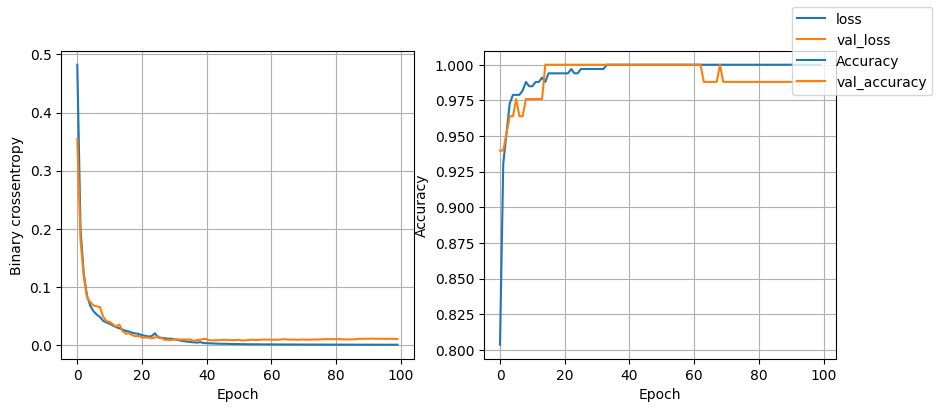

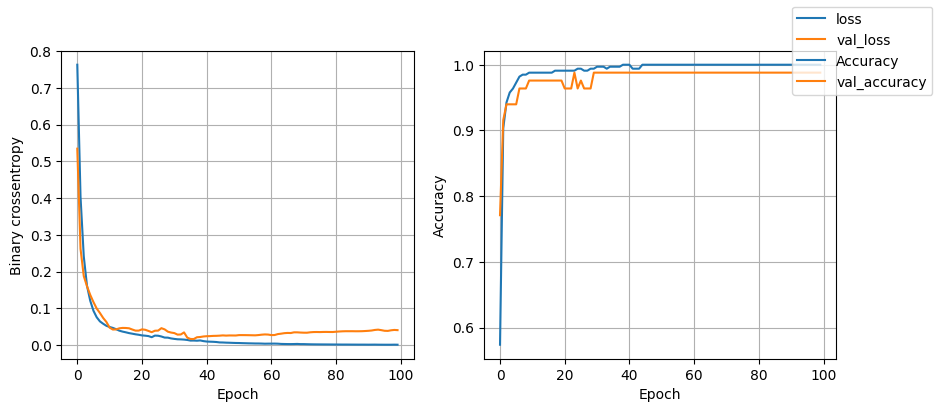

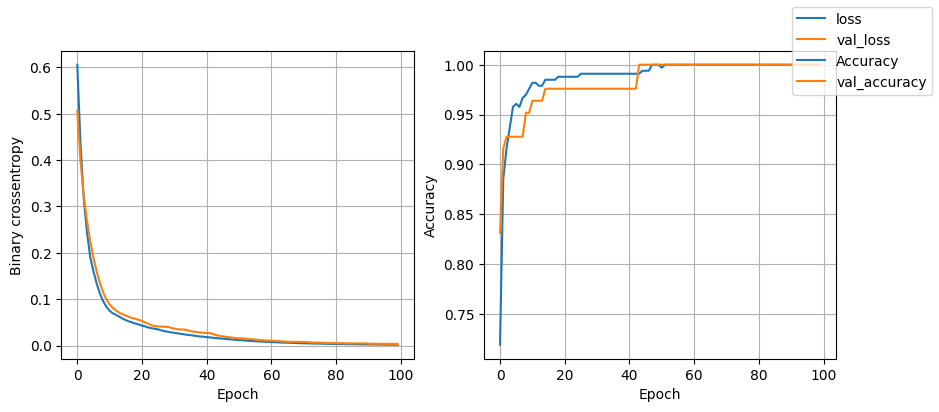

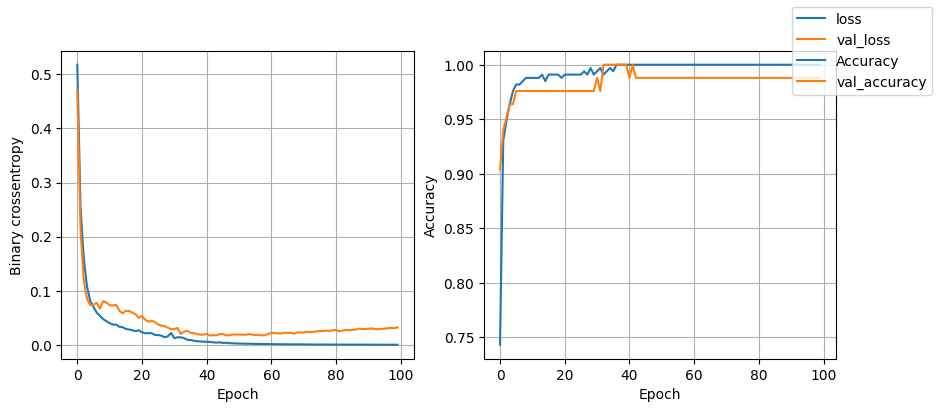

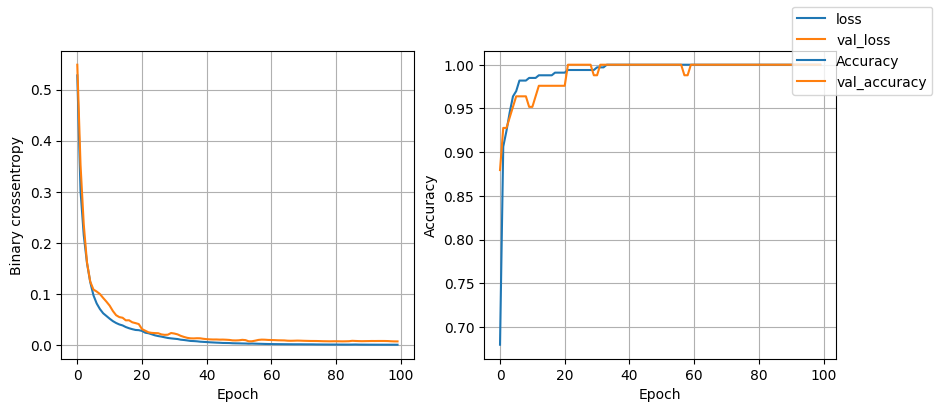

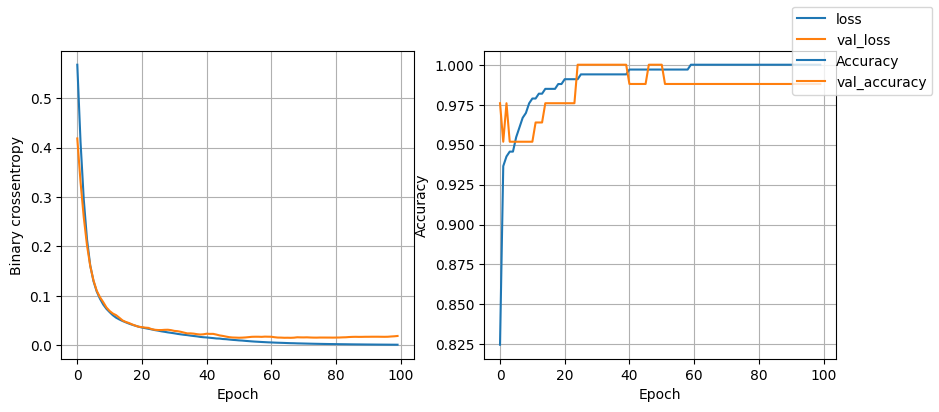

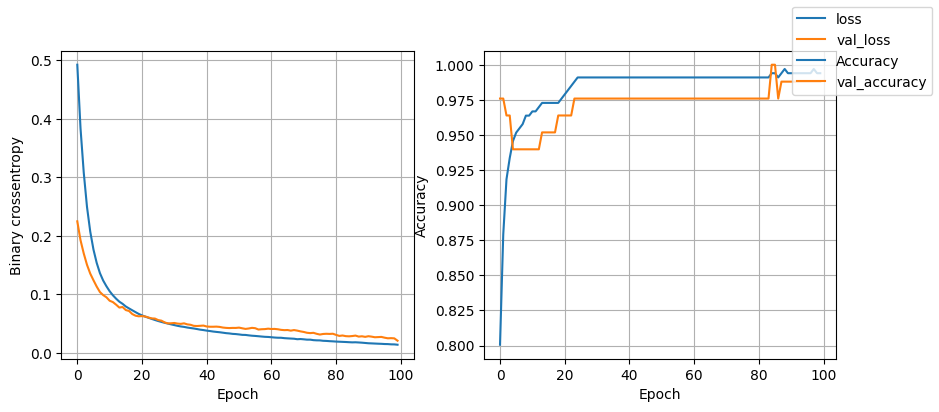

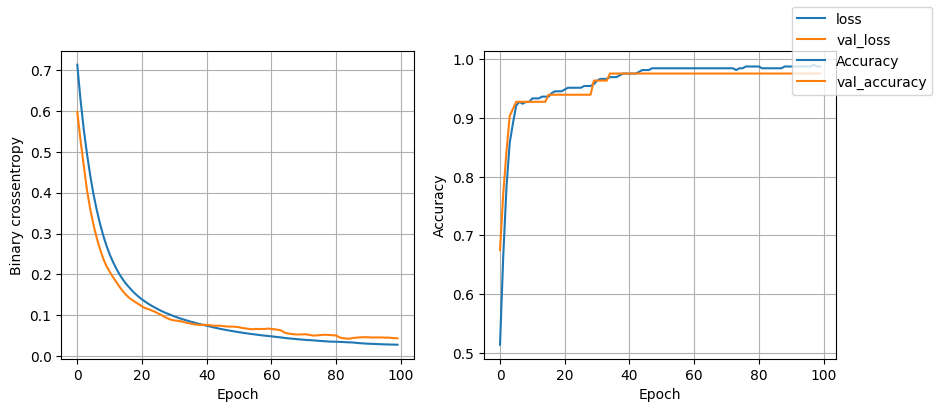

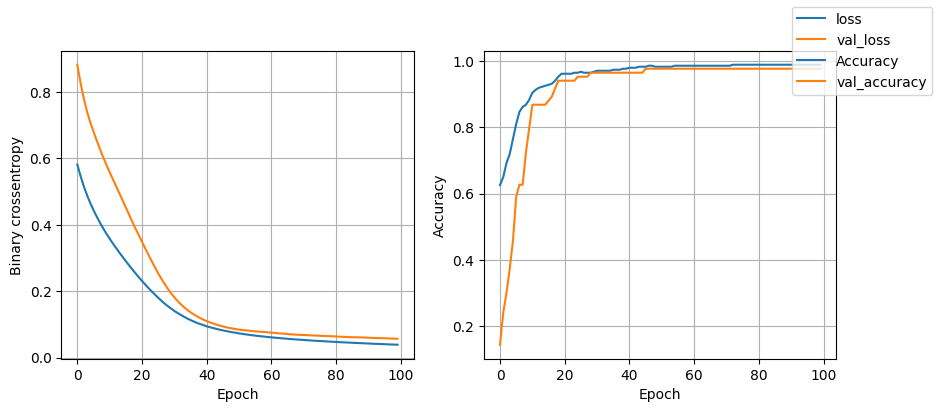

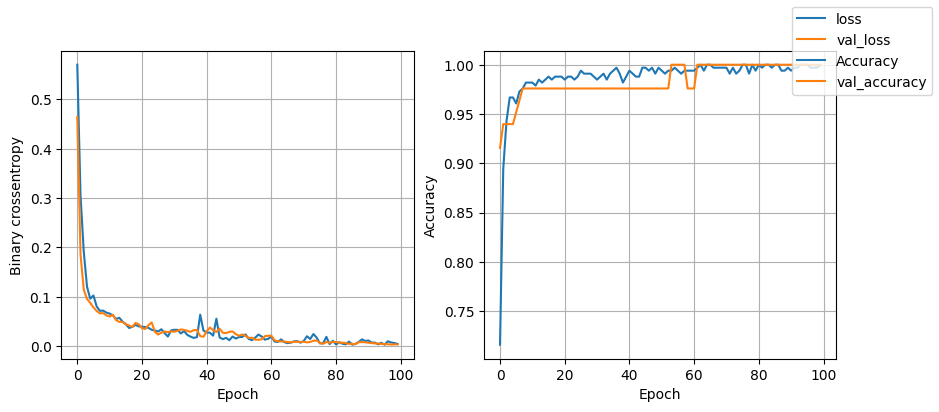

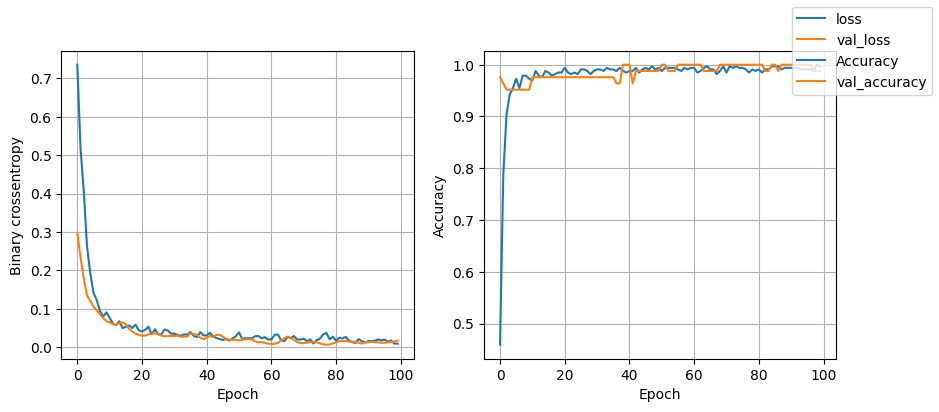

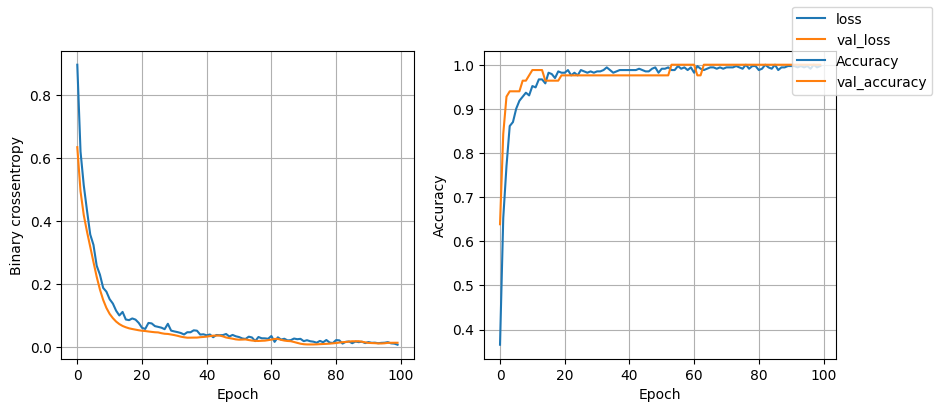

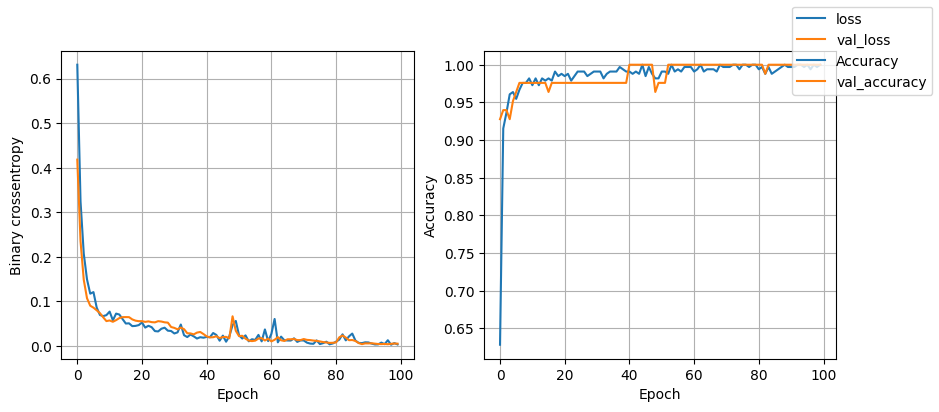

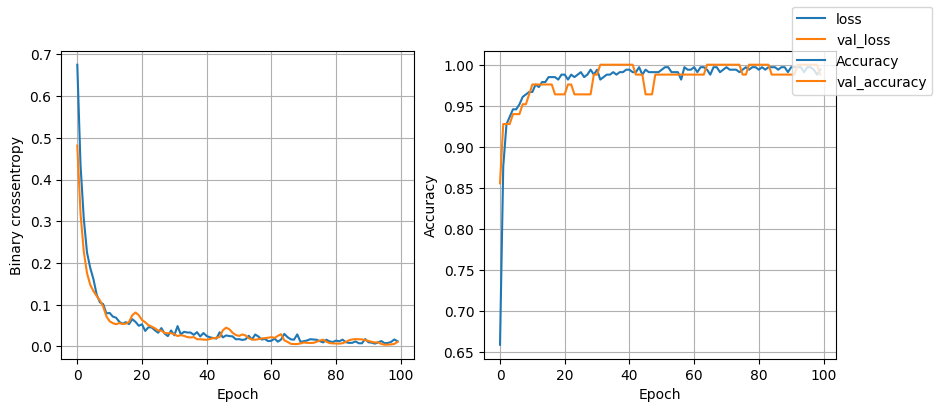

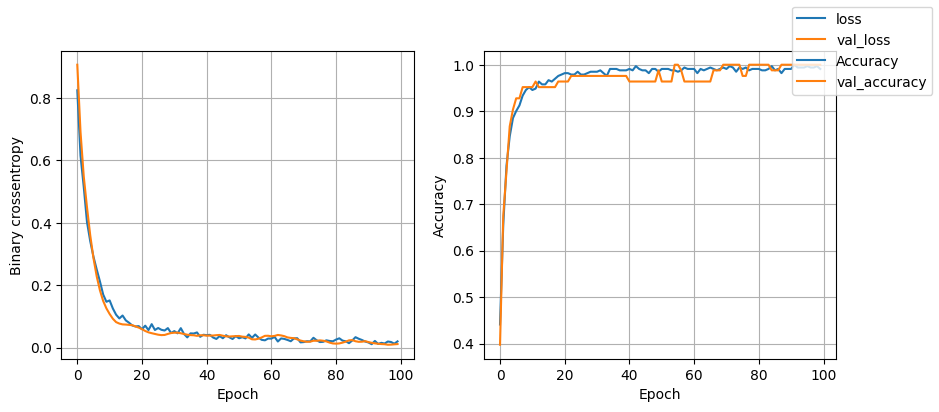

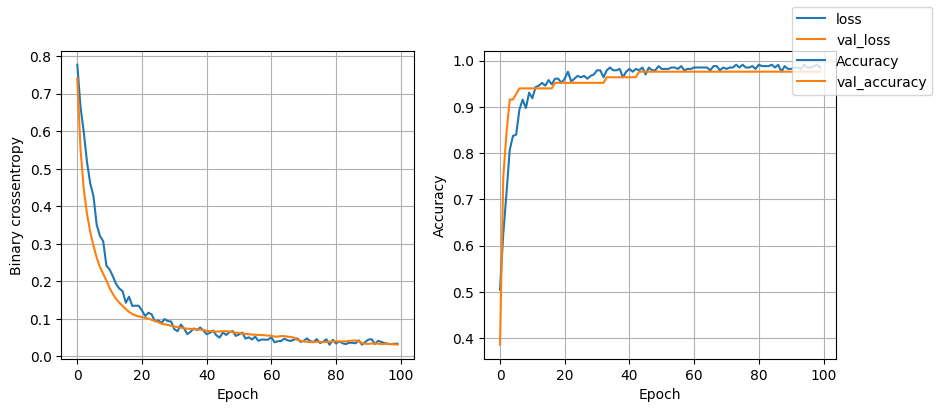

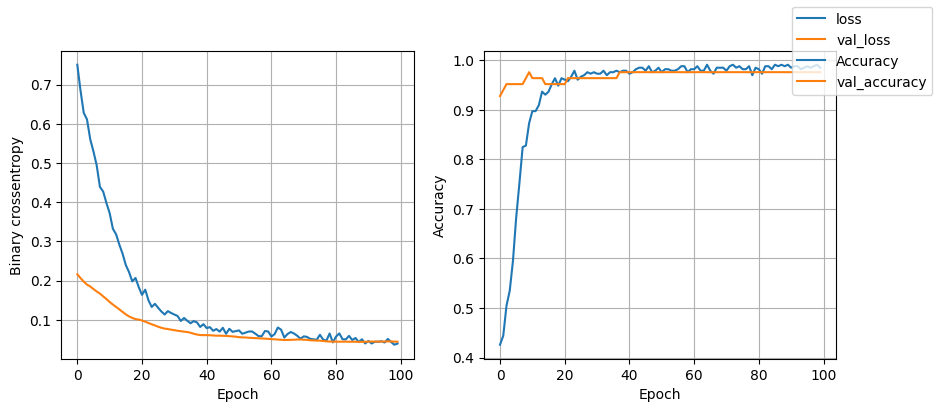

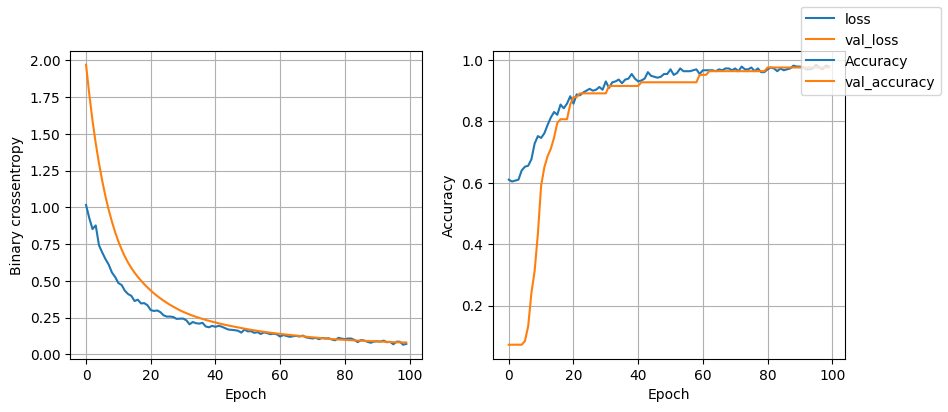

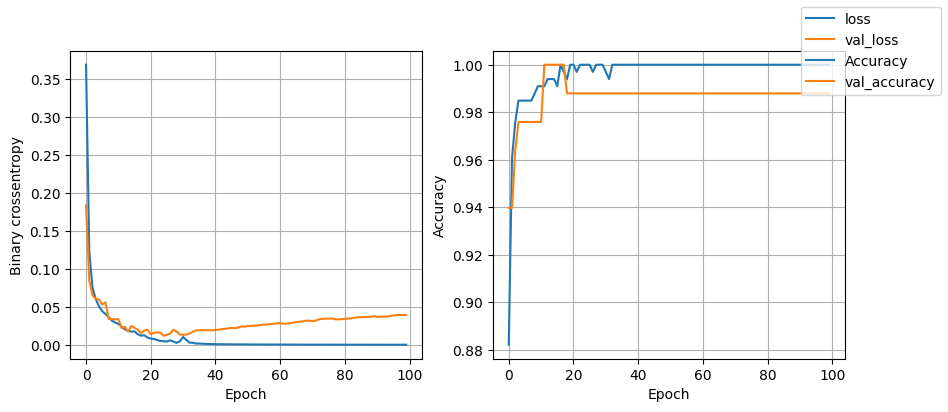

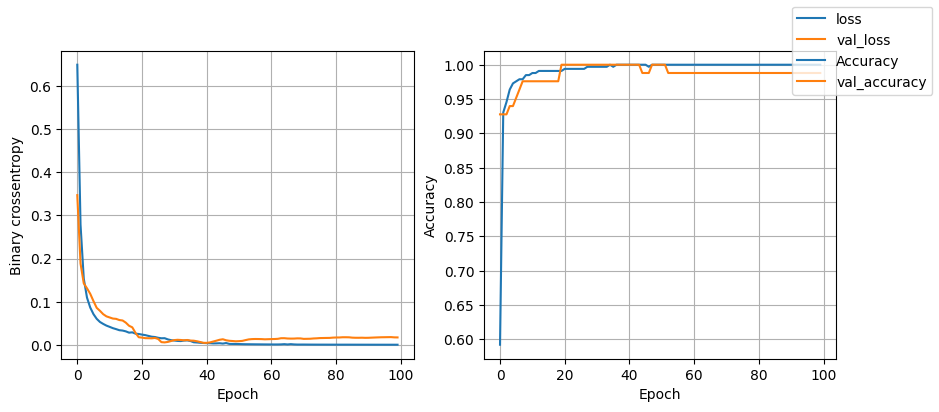

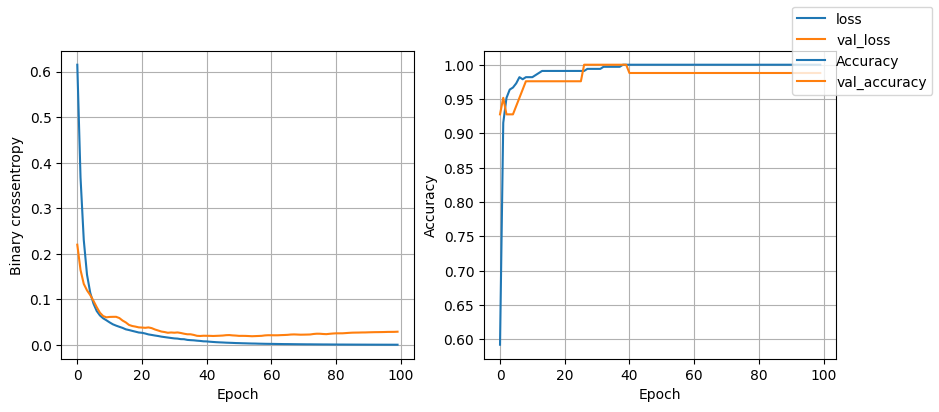

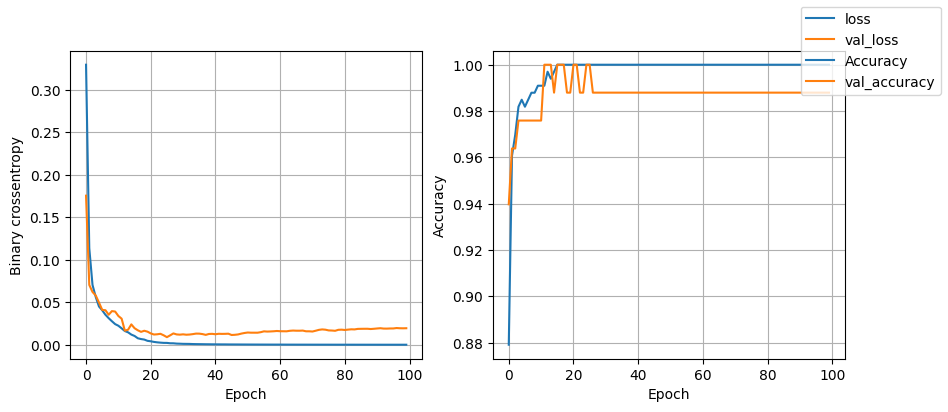

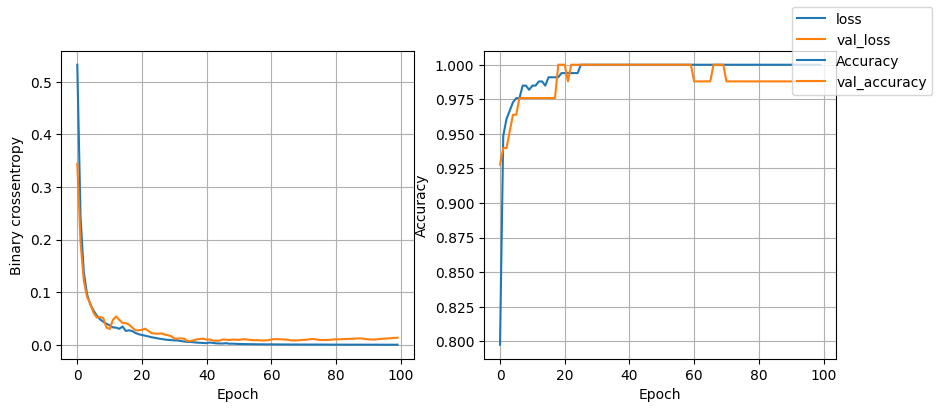

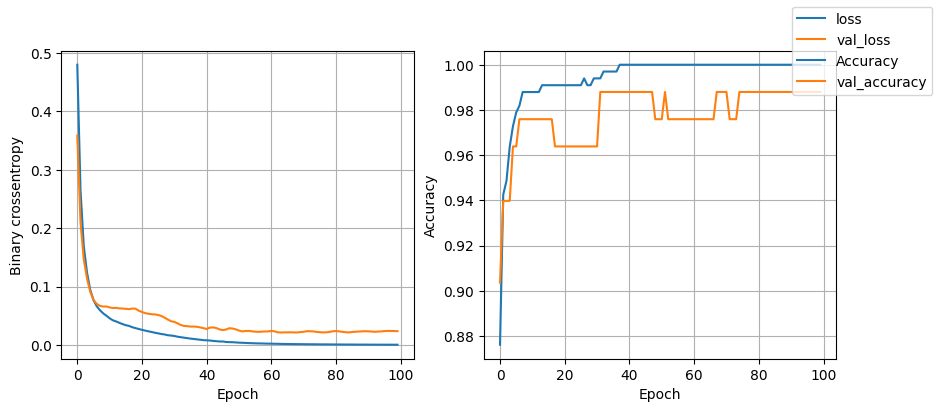

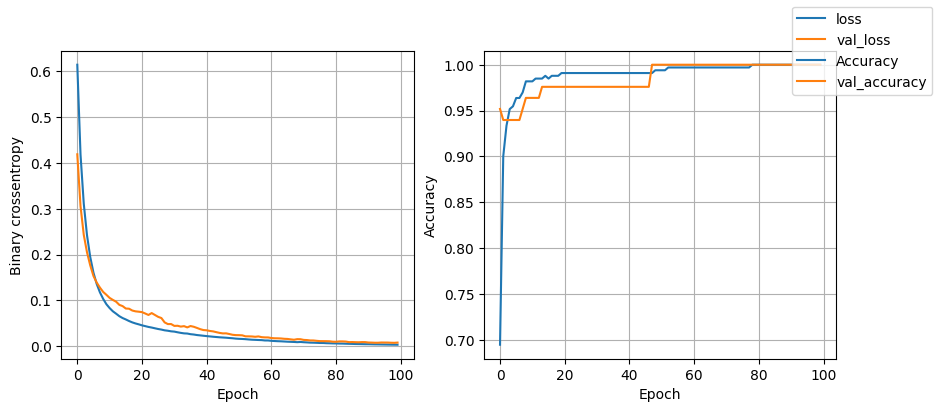

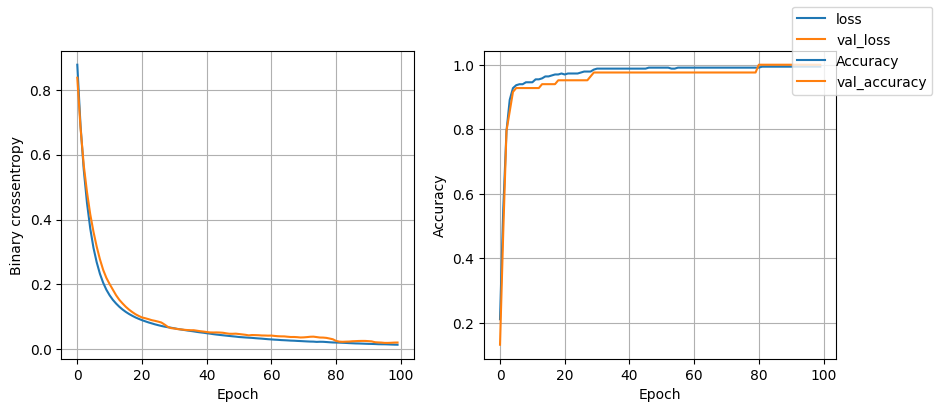

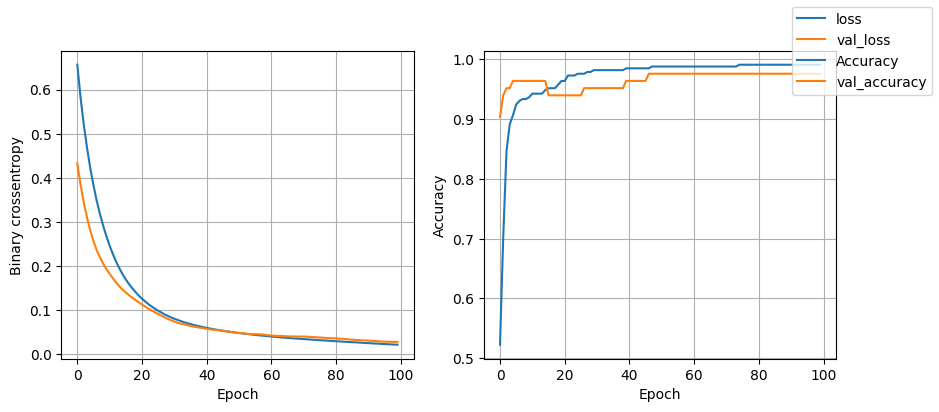

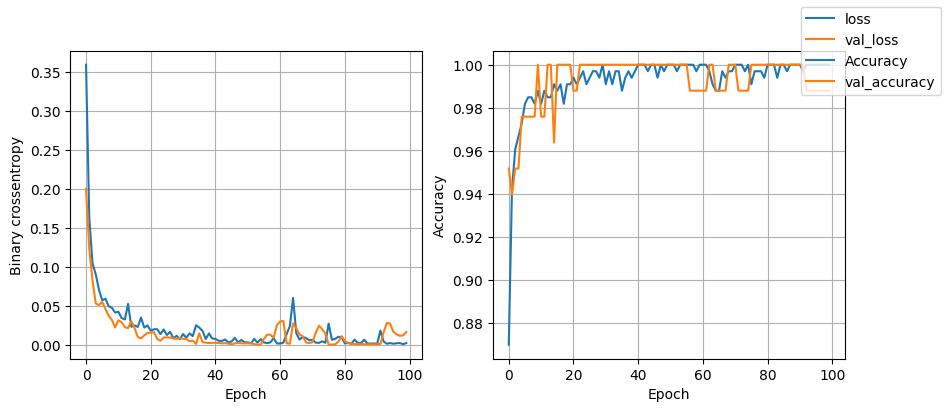

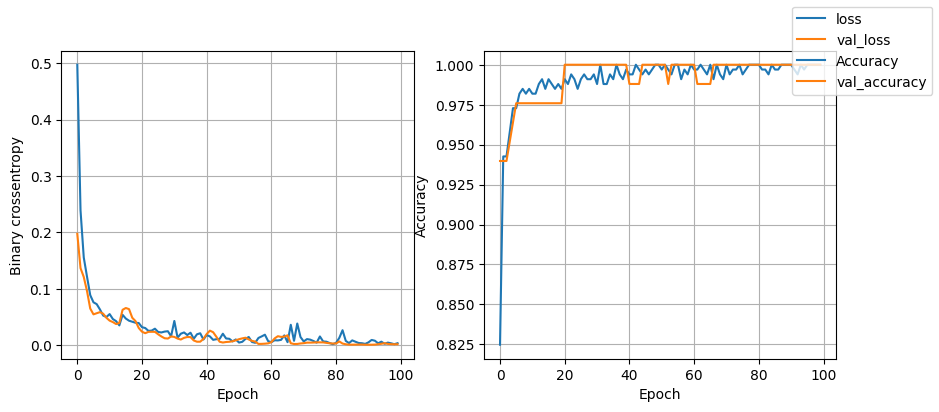

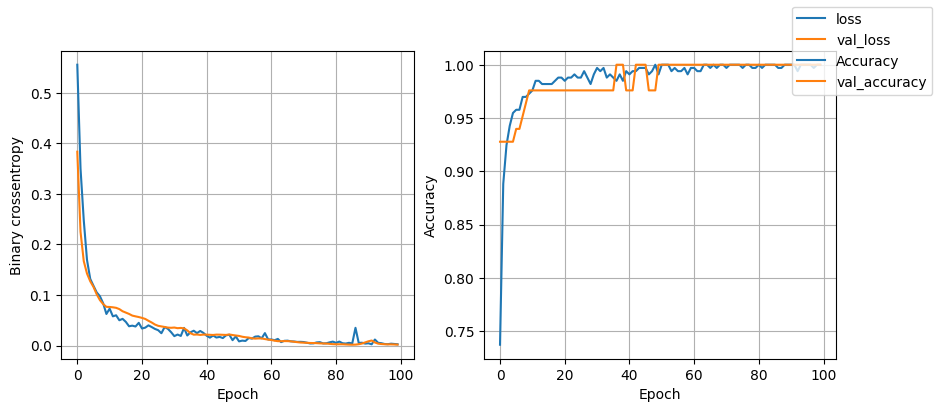

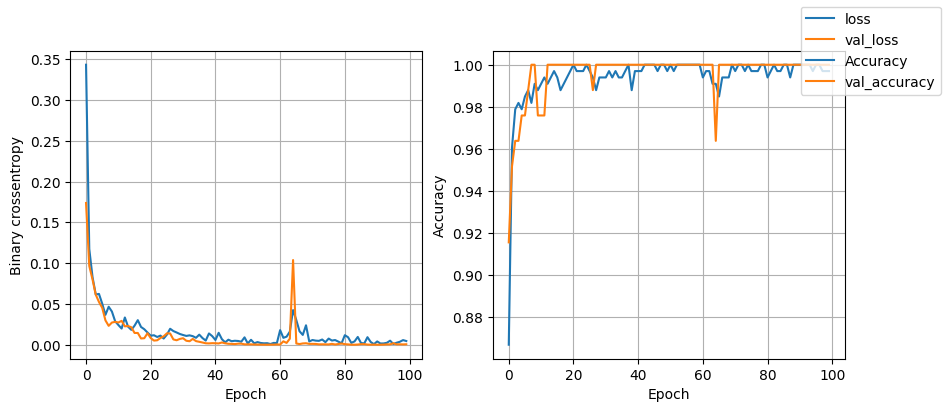

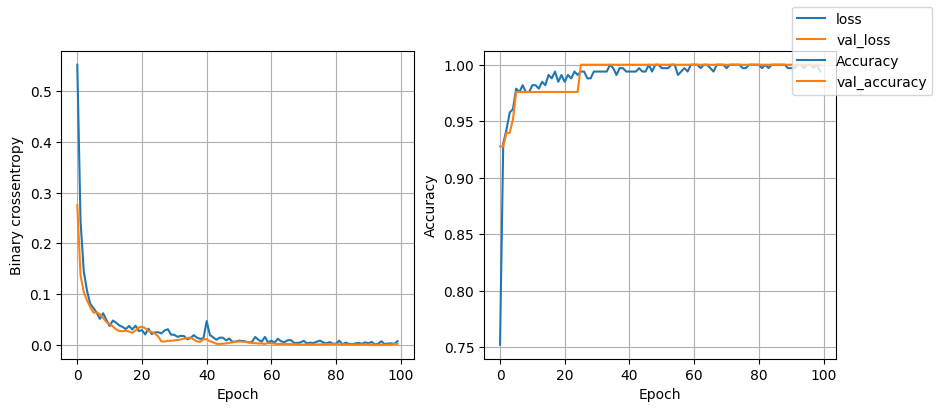

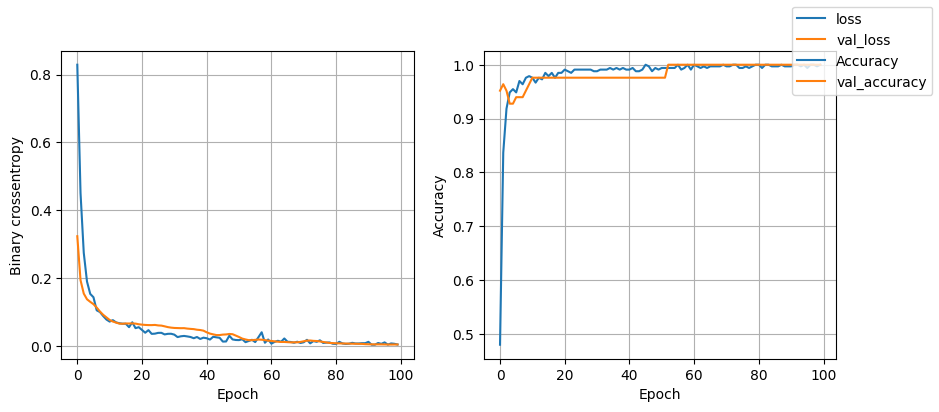

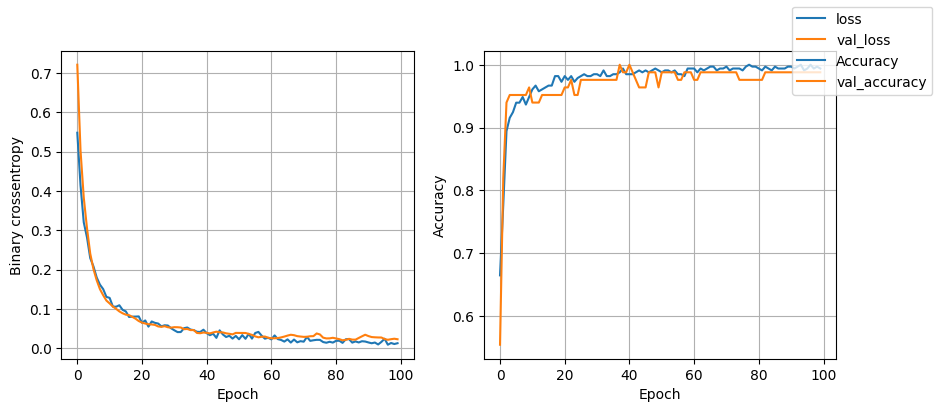

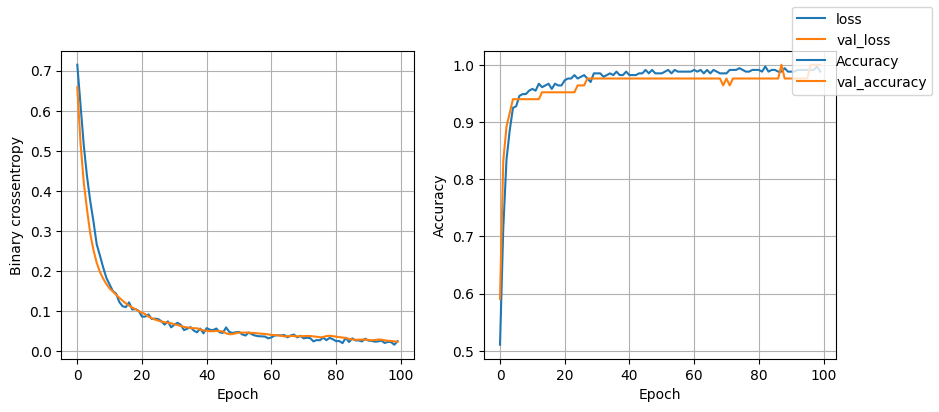

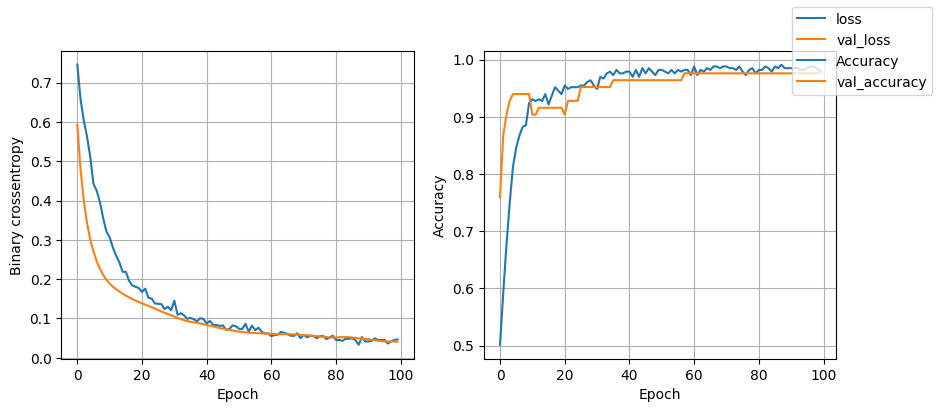

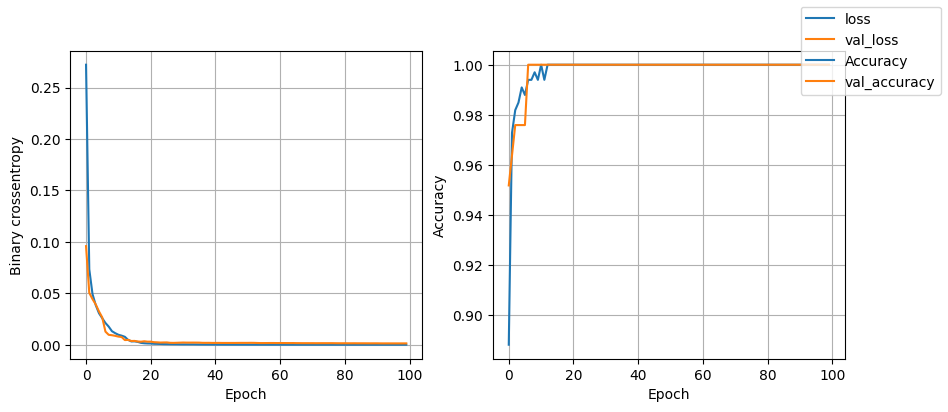

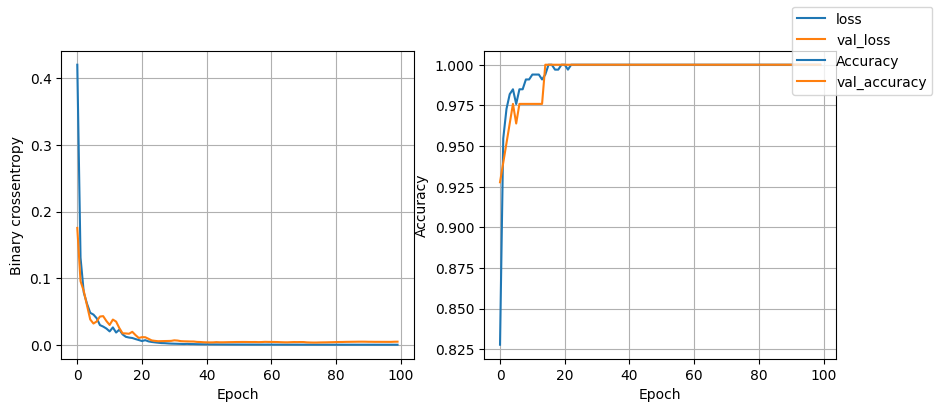

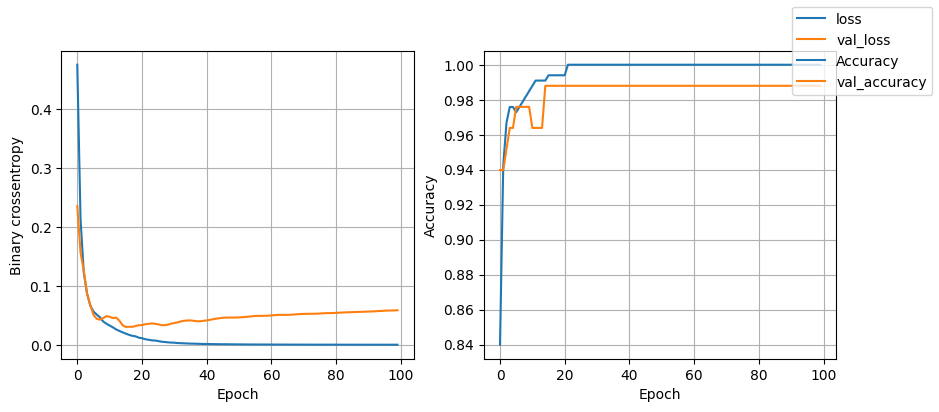

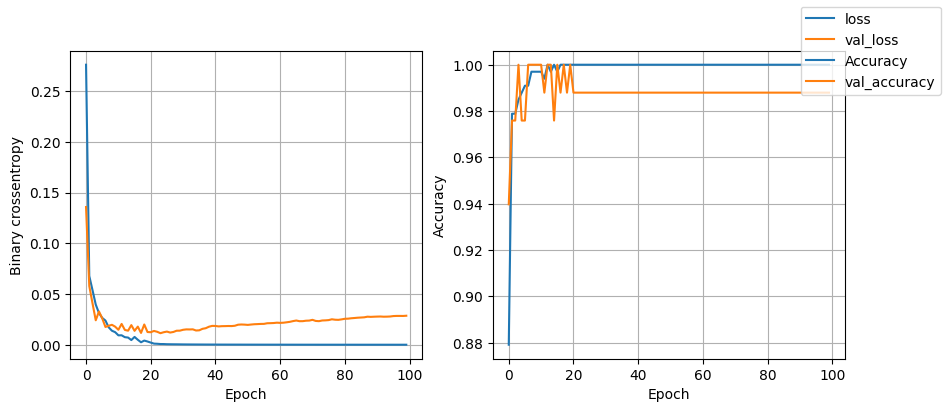

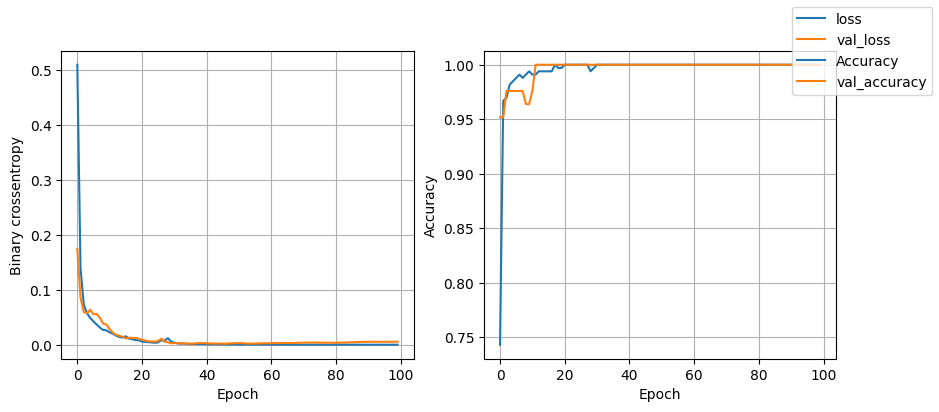

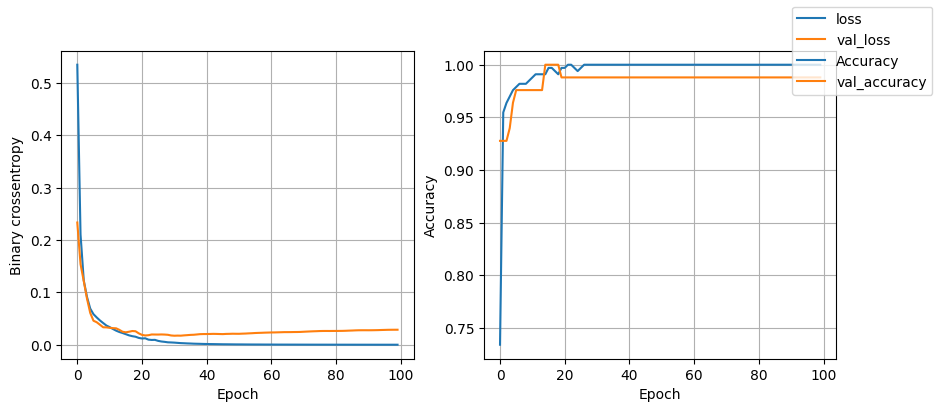

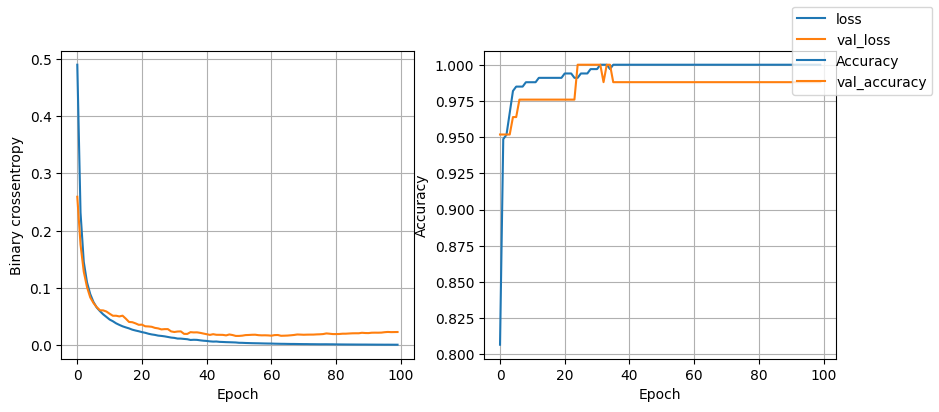

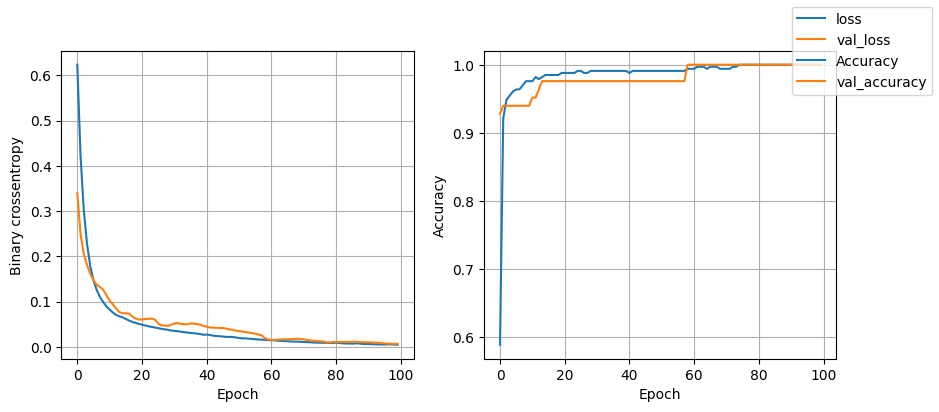

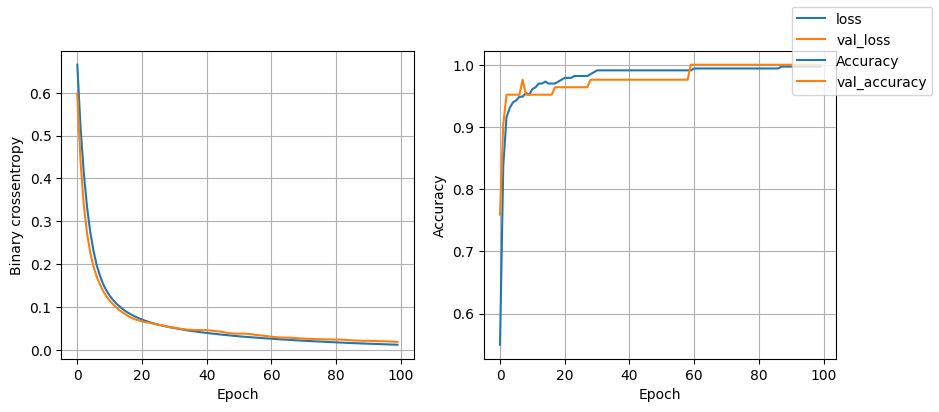

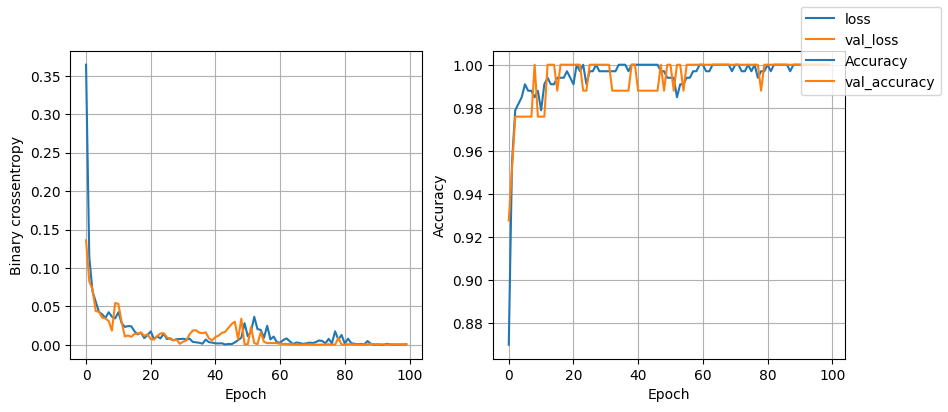

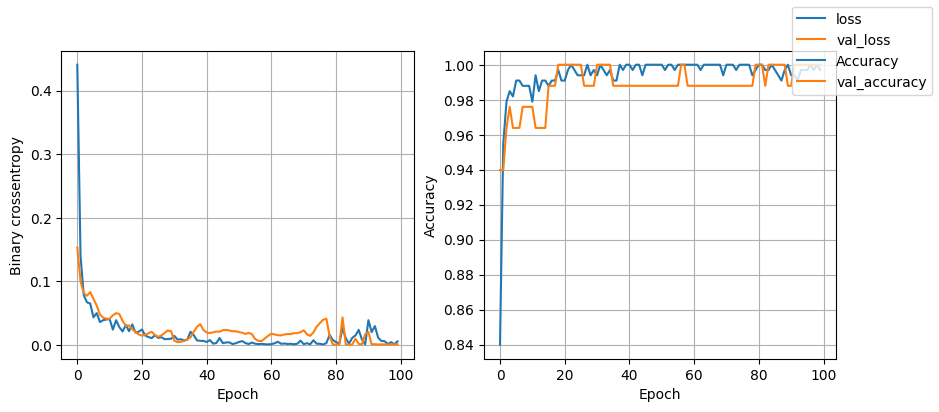

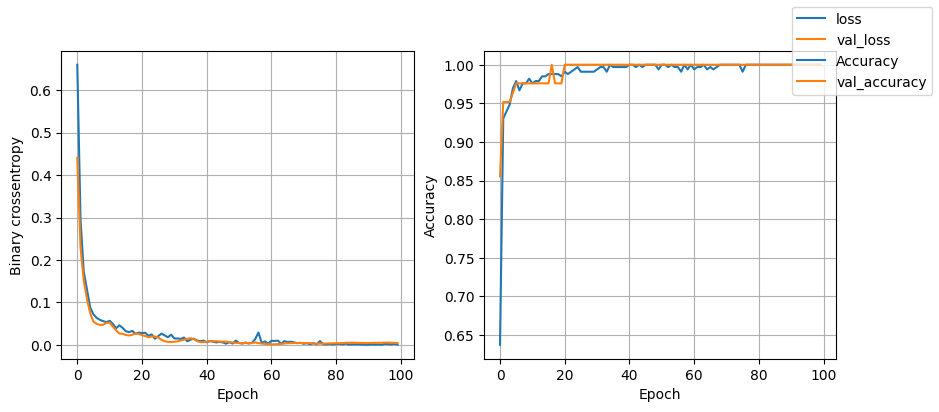

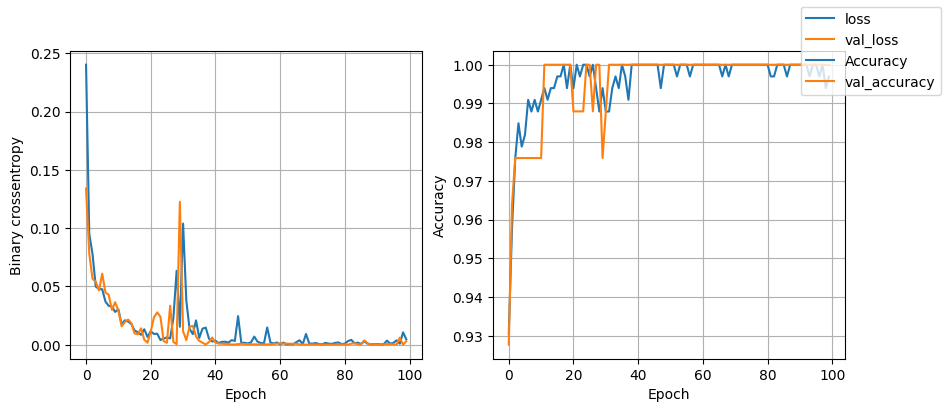

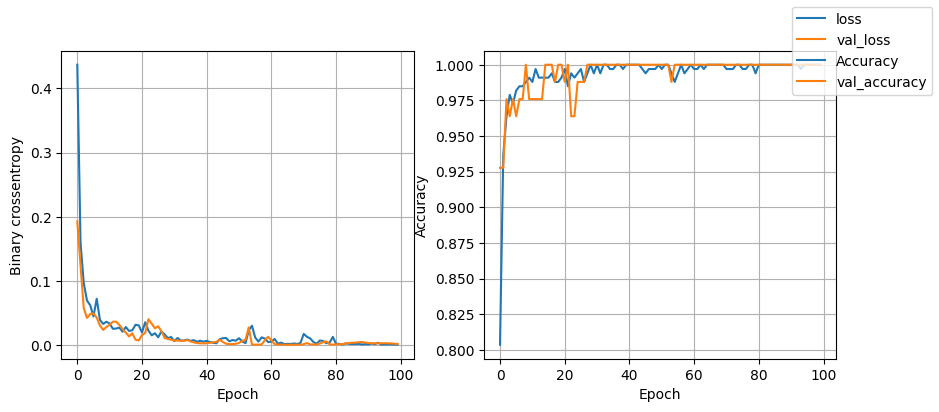

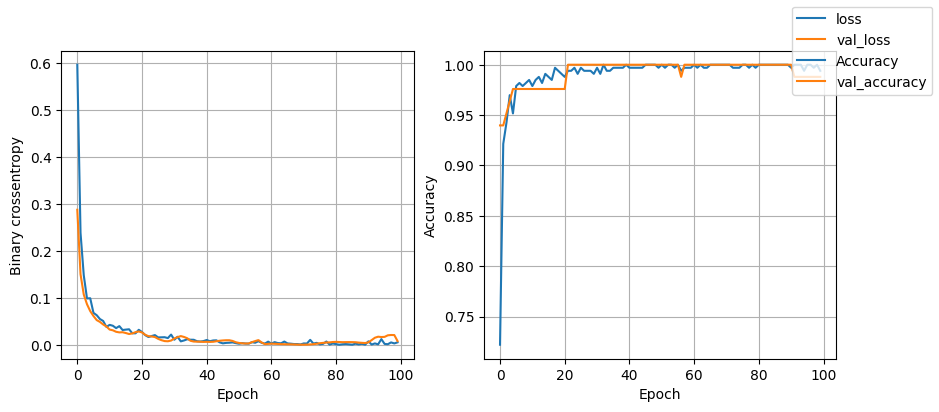

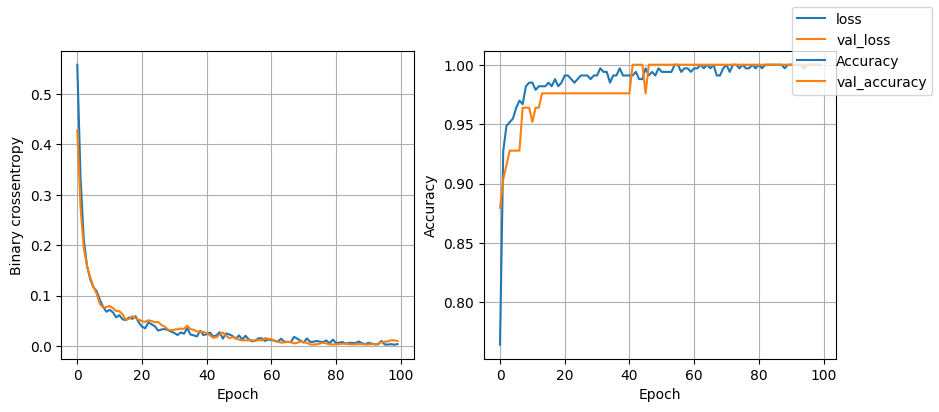

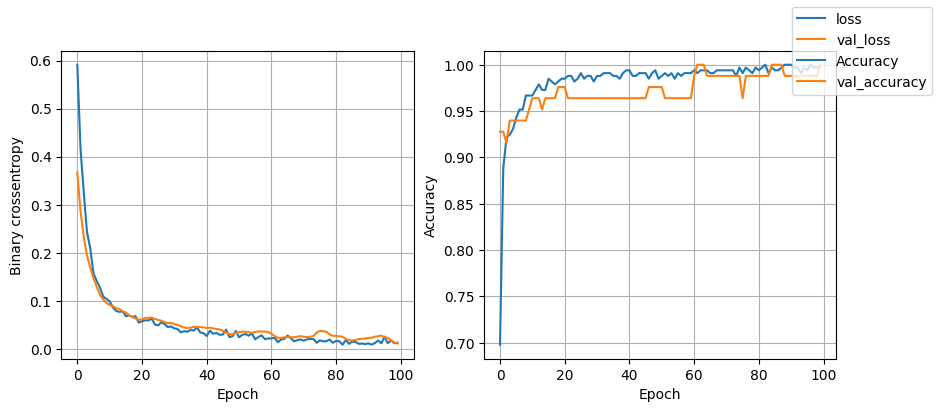

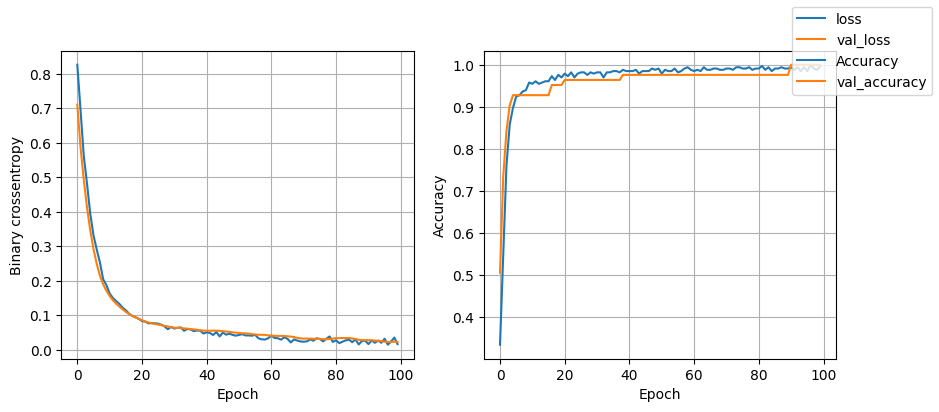

In [34]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for learn_rate in [0.005, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate of {learn_rate}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learn_rate, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model